In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 9.9 MB/s eta 0:00:00


In [ ]:
import shap
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
dataset=pd.read_csv('Model 6.csv')

In [ ]:
dataset.head(5)

,SSL(t-3),SSL(t-2),SSL(t-1),SSL(t),q(t-3),q(t-2),q(t-1),q(t)
0,0.5,1.1,0.7,0.4,1.9,2.7,2.6,2.2
1,1.1,0.7,0.4,0.5,2.7,2.6,2.2,2.0
2,0.7,0.4,0.5,1.2,2.6,2.2,2.0,2.7
3,0.4,0.5,1.2,1.9,2.2,2.0,2.7,3.2
4,0.5,1.2,1.9,1.0,2.0,2.7,3.2,2.4


In [ ]:
 ##Split into features (X) and target (y)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

In [ ]:
# Prepares a default instance of the random forest regressor
model = RandomForestRegressor()
# Fits the model on the data
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
print("X_train : ",X_train.shape)

print("X_test : ",X_test.shape)

print("y_train : ",y_train.shape)

print("y_test : ",y_test.shape)

X_train :  (3472, 7)
X_test :  (869, 7)
y_train :  (3472,)
y_test :  (869,)


In [ ]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Exact explainer: 870it [02:12,  6.25it/s]


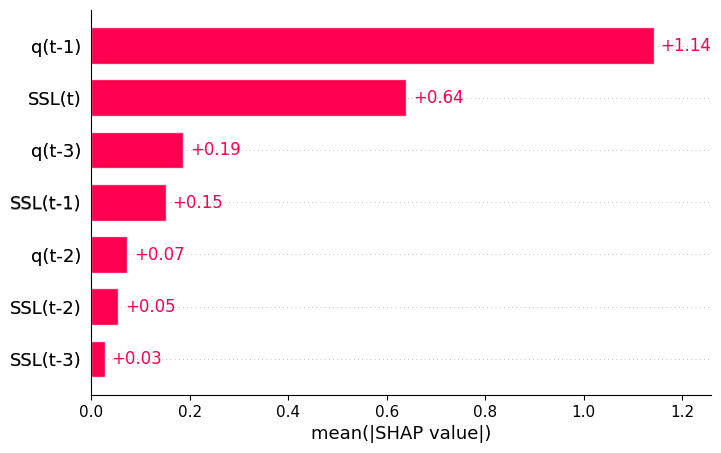

In [ ]:
shap.plots.bar(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


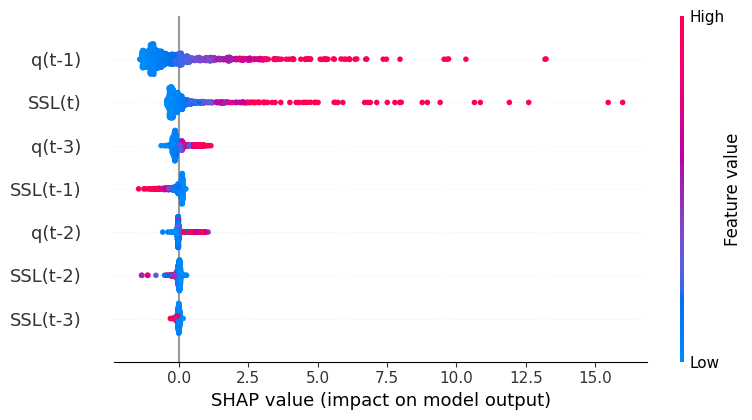

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


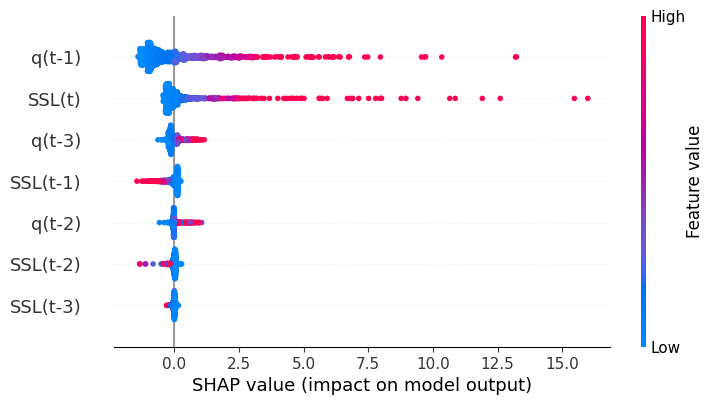

In [ ]:
shap.summary_plot(shap_values)
# or 
shap.plots.beeswarm(shap_values)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


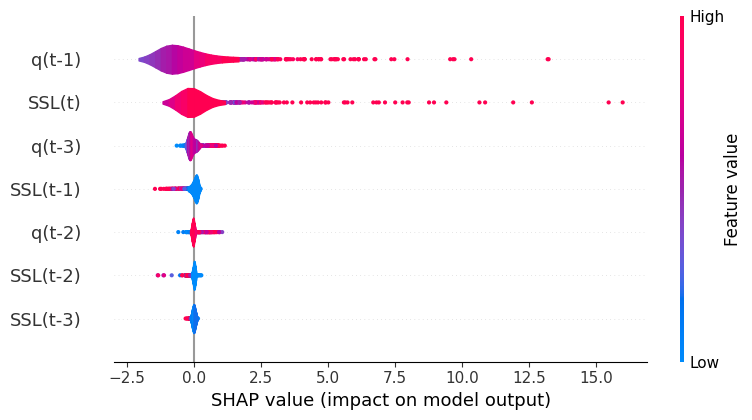

In [ ]:
shap.summary_plot(shap_values, plot_type='violin')

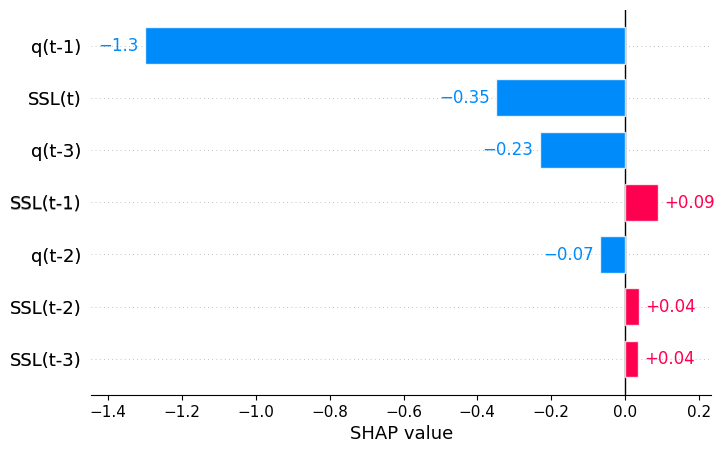

In [ ]:
shap.plots.bar(shap_values[0])

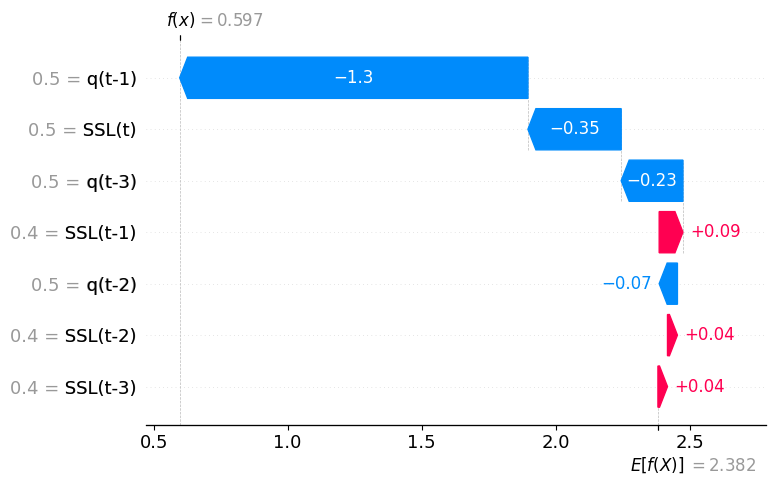

In [ ]:
shap.plots.waterfall(shap_values[0])